# Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import math

url = "https://raw.githubusercontent.com/Shreesh90/IML_Assignments/master/A2/HousingPrice.csv"

df = pd.read_csv(url)

Price = df['price']
FloorArea = df['lotsize']
NoOfBedrooms = df['bedrooms']
NoOfBathrooms = df['bathrms']

MatrixY = Price
MatrixY = np.array(MatrixY)
MatrixY = MatrixY.reshape(MatrixY.shape[0], 1)

## Feature scaling on FloorArea

In [ ]:
# FLOOR AREA HAS HIGH VARIANCE SO IT IS IMPORTANT TO SCALE THIS FEATURE

FloorAreaMean = np.mean(FloorArea)
FloorAreaMin = min(FloorArea)
FloorAreaMax = max(FloorArea)
FloorAreaScaled = (FloorArea - FloorAreaMean)/(FloorAreaMax - FloorAreaMin)
FloorArea, FloorAreaScaled


(0      5850
 1      4000
 2      3060
 3      6650
 4      6360
        ... 
 541    4800
 542    6000
 543    6000
 544    6000
 545    6000
 Name: lotsize, Length: 546, dtype: int64, 0      0.048092
 1     -0.079056
 2     -0.143661
 3      0.103075
 4      0.083143
          ...   
 541   -0.024073
 542    0.058401
 543    0.058401
 544    0.058401
 545    0.058401
 Name: lotsize, Length: 546, dtype: float64)

# Declaring Useful Variables

In [ ]:
n, m = df.shape
n, m

(546, 13)

In [ ]:
n_train = math.floor(n * 0.70)
n_test = n - n_train
n_train, n_test

(382, 164)

In [ ]:
col = [1] * n
data_scaling = list(zip(col,FloorAreaScaled,NoOfBedrooms,NoOfBathrooms))
len(data_scaling)

546

In [ ]:
# X_train, Y_train, X_test, Y_test with scaling
X_train = np.array(data_scaling[:n_train])
Y_train = np.array(Price[:n_train])

X_test = np.array(data_scaling[n_train+1:])
Y_test = np.array(Price[n_train+1:])

# LWR

In [ ]:
def calculate_error(MatrixY, Y_pred):
    error = 0
    for i in range(len(MatrixY)):
        error += abs(MatrixY[i] - Y_pred[i]) / MatrixY[i]
    error = error / len(MatrixY)
    return error * 100

def kernel(MatrixX, xi, HyperParameterTau):
    return np.exp(-np.sum((xi - MatrixX) ** 2, axis = 1) / (2 * HyperParameterTau * HyperParameterTau))

def LocallyWeightedLR(MatrixX, xi, MatrixY, HyperParameterTau):
	TransposeMatrixX = np.transpose(MatrixX)
	W = kernel(MatrixX, xi, HyperParameterTau)
	MatrixXTransposeW = TransposeMatrixX * W
	MatrixXTransposeWX = np.matmul(MatrixXTransposeW, MatrixX)
	InverseMatrixXTransposeWX = np.linalg.pinv(MatrixXTransposeWX)
	InverseMatrixXTransposeWXMatrixXTransposeW = np.matmul(InverseMatrixXTransposeWX, MatrixXTransposeW)
	InverseMatrixXTransposeWXMatrixXTransposeWY = np.matmul(InverseMatrixXTransposeWXMatrixXTransposeW, MatrixY)
	InverseMatrixXTransposeWXMatrixXTransposeWYTranspose = np.transpose(InverseMatrixXTransposeWXMatrixXTransposeWY)
	return InverseMatrixXTransposeWXMatrixXTransposeWYTranspose.dot(xi)


# Using Multiple values of Tau

In [ ]:
MatrixX = []
for i in range(len(FloorArea)):
	MatrixX.append([1, FloorAreaScaled[i], NoOfBedrooms[i], NoOfBathrooms[i]])
MatrixX = np.array(MatrixX)

Taus = [0.1, 0.01, 0.02, 0.001, 0.001, 0.0001, 0.00001, 0.000001]
errors = []
for Tau in Taus:
  print("Using Locally Weighted Linear Regression for Tau = " + str(Tau))
  pred = []
  for i in range(MatrixX.shape[0]):
    y_pred = LocallyWeightedLR(MatrixX, MatrixX[i], MatrixY, Tau)
    pred.append(y_pred)
  print("Mean absolute percentage error is : " + str(calculate_error(MatrixY,pred)))
  errors.append(calculate_error(MatrixY,pred))

Using Locally Weighted Linear Regression for Tau = 0.1
Mean absolute percentage error is : [20.14065581]
Using Locally Weighted Linear Regression for Tau = 0.01
Mean absolute percentage error is : [16.41583941]
Using Locally Weighted Linear Regression for Tau = 0.02
Mean absolute percentage error is : [18.12596846]
Using Locally Weighted Linear Regression for Tau = 0.001
Mean absolute percentage error is : [7.56066413]
Using Locally Weighted Linear Regression for Tau = 0.001
Mean absolute percentage error is : [7.56066413]
Using Locally Weighted Linear Regression for Tau = 0.0001
Mean absolute percentage error is : [5.40856556]
Using Locally Weighted Linear Regression for Tau = 1e-05
Mean absolute percentage error is : [5.40730554]
Using Locally Weighted Linear Regression for Tau = 1e-06
Mean absolute percentage error is : [5.40730554]


# Plotting Graph for different values of Tau vs Error

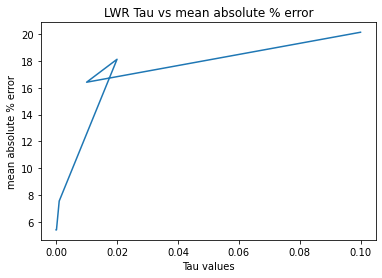

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Taus,errors)
plt.xlabel("Tau values")
plt.ylabel("mean absolute % error")
plt.title("LWR Tau vs mean absolute % error")
plt.show()

# Batch Gradient Descent with regularization

In [ ]:
# FUNCTION TO FIND SLOPE
def Slope(theta, X_train, Y_train):
    slope = np.zeros(theta.shape)
    for i in range(len(X_train)):
        itr = 0
        for j in range(theta.shape[1]):
            itr = itr + theta[0][j] * X_train[i][j]
        slope += (itr - Y_train[i]) * X_train[i]
    return slope

In [ ]:
lr = 0.001
Lambda = -120
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
for epochs in range(5000):
    cof = 1 - ((lr*Lambda)/n_train)
    theta = cof*theta - (lr/n_train)*Slope(theta, X_train,Y_train)
theta

array([[10854.7790114 , 18034.6716255 ,  5068.24913908, 31438.87102068]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


18.92124816522627

# Using Stochastic gradient with Regularization

In [ ]:
# FUNCTION TO FIND SLOPE FOR STOCHASTIC DESCENT
def SlopeStoch(theta, X_train, Y, ind):
	itr = 0
	for j in range(theta.shape[1]):
		itr = itr + theta[0][j]*X_train[j]
	return (itr - Y) * X_train[ind]


In [ ]:
lr = 0.00001
Lambda = 30
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
for itr in range(10):
  for i in range(X_train.shape[0]):
    cof = 1-((Lambda*lr)/n_train)
    theta = cof*theta - lr*(SlopeStoch(theta, X_train, Y_train[i], i))
theta

array([[2219.19847494,   16.93408054, 5538.96715982, 3120.76286454]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])) / Y_test[i]
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


68.24222400621996

# Using Minibatch gradient without regularisation

In [ ]:
# USEFUL FUNCTIONS FOR MINI BATCH GRADIENT 
def product(w,x):
    ans=0
    for i in range(x.shape[0]):
        ans= ans + w[0][i]*x[i]
    return ans

def gradient(x,w,y,st,bs):
    ans=np.zeros(w.shape)
    for i in range(st,st+bs):
        if(i>=x.shape[0]):
          break
        ans=(ans+(product(w,x[i])-y[i])*x[i])
    return ans


In [ ]:
BatchSize = 20;
lr = 0.0002
Lambda = -20
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
for itr in range(50):
  for i in range(BatchSize):
    temp = 1-((Lambda*lr)/BatchSize)
    theta = (temp * theta) - (lr * gradient(X_train, theta, Y_train, BatchSize*i, BatchSize))/ BatchSize

theta

array([[ 5231.20289362,   247.60936576, 15585.22770405,  7672.11402056]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


23.185650124145248